# Deep Learning with CNNs OR RNNs (Sequence Models) 
### Choice B- Deep Learning with RNNs
### Zeyuan Zhu

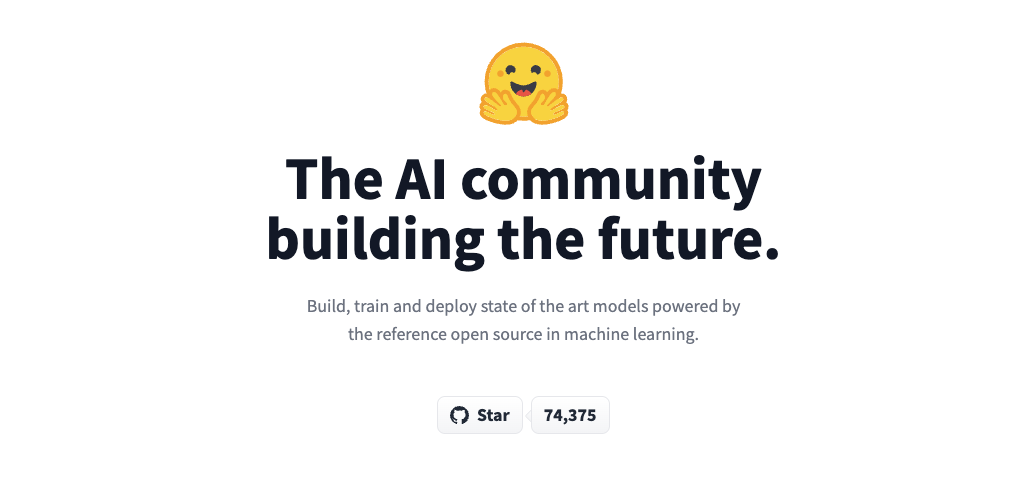

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.0 MB/s 
     |████████████████████████████████| 7.6 MB 37.8 MB/s 
     |████████████████████████████████| 182 kB 58.7 MB/s 


### Run a Fill-Mask language model.

In [5]:

from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-chinese')
unmasker("床前明[MASK]光，疑是地上霜。举头望明月，低头思故乡")

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

[{'score': 0.9955912828445435,
  'token': 3299,
  'token_str': '月',
  'sequence': '床 前 明 月 光 ， 疑 是 地 上 霜 。 举 头 望 明 月 ， 低 头 思 故 乡'},
 {'score': 0.0021611854899674654,
  'token': 7262,
  'token_str': '镜',
  'sequence': '床 前 明 镜 光 ， 疑 是 地 上 霜 。 举 头 望 明 月 ， 低 头 思 故 乡'},
 {'score': 0.0012790601467713714,
  'token': 3189,
  'token_str': '日',
  'sequence': '床 前 明 日 光 ， 疑 是 地 上 霜 。 举 头 望 明 月 ， 低 头 思 故 乡'},
 {'score': 0.00022834907576907426,
  'token': 4169,
  'token_str': '烛',
  'sequence': '床 前 明 烛 光 ， 疑 是 地 上 霜 。 举 头 望 明 月 ， 低 头 思 故 乡'},
 {'score': 0.00015722560056019574,
  'token': 1915,
  'token_str': '夜',
  'sequence': '床 前 明 夜 光 ， 疑 是 地 上 霜 。 举 头 望 明 月 ， 低 头 思 故 乡'}]

BERT is a transformers model pretrained on a large corpus of language data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labeling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. 

I choose the most famous chinese poetry as a test, it can find the original text well, and get almost full marks。

### Run a Question Answering language model 

In [9]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': '''what related to Glass's use of popular elements
in his classical compositions?''',

    'context': '''Reviving the practice of using elements of popular music in classical composition, an approach
that had been in hibernation in the United States during the 1960s, composer Philip Glass (born
1937) embraced the ethos of popular music in his compositions. Glass based two symphonies
on music by rock musicians David Bowie and Brian Eno, but the symphonies' sound is
distinctively his. Popular elements do not appear out of place in Glass's classical music, which
from its early days has shared certain harmonies and rhythms with rock music. Yet this use of
popular elements has not made Glass a composer of popular music. His music is not a version
of popular music packaged to attract classical listeners; it is high art for listeners steeped in
rock rather than the classics. '''
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [10]:
res

{'score': 0.006018595304340124,
 'start': 554,
 'end': 618,
 'answer': '\npopular elements has not made Glass a composer of popular music'}

- Create one hot representation of input. We want one hot representation as opposed to a list of integer tokens as integers are not differentiable.
- Mutliply one hot representation by model embedding matrix and feed into model using `inputs_embeds` and get prediciton for start and end span positions
- Get gradient of correct start and end span position wrt to ohe input.
- For a list of additional  saliency methods (SmoothGrad, Integrated Gradients, Guided Backprop, GradCam etc ),

Explanations like the gradient method above and model output provide a few insights on BERT based QA models.

We see that in cases where BERT does not have an answer (e.g. it outputs a CLS token only), it generally does not have high normalized gradient scores for most of the input tokens. Perhaps explanation scores can be combined with model confidence scores (start/end span softmax) to build a more complete metric for confidence in the span prediction.

For complex text(GRE LEVEL) the model still not accurate enough

### Run a Summarization language model.

In [12]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ When Jasmine Taylor turned 30 a year and a half ago, her personal finances were a mess. “I told myself, this is my last year of living like this,” she said to me. She hunted for a system that would help her discipline her spending and came upon a budgeting strategy called cash-stuffing that she’s been using ever since.
She takes her weekly income in cash and stuffs it into clear plastic envelopes in a colorful binder, one envelope for each category of spending. If her envelope for groceries is empty before the month is over, she’ll make do with the food she has at home. On the first of each month she deposits cash in the bank to cover that month’s recurring bills. She uses credit cards for online spending but pays them off in full with the cash from her binders.
Cash-stuffing hasn’t just disciplined her spending; it has also given her a new career as a social media influencer. She has more than 600,000 followers on TikTok, more than 160,000 on Facebook, 118,000 on Instagram and more than 90,000 on YouTube. She regularly posts videos of her hands counting and distributing currency while tallying everything up on paper in one of her notebooks. Thanks to cash-stuffing, she said, “I’m making a very good living.”
I confess that I knew nothing about cash-stuffing until a few weeks ago, when I got an email pitch about it from a personal finance company. When I write about personal finance it’s usually to share the ideas of academic economists who specialize in lofty concepts such as lifecycle consumption smoothing. When I write about cash it’s usually to muse on its gradual disappearance. Last year cash was used for just 20 percent of all payments, down from 31 percent in 2017, according to an annual survey by the Federal Reserve. I always thought, Why use cash when credit cards, debit cards and A.C.H. payments are faster and easier?
Clearly I was missing something big. Credello, the company that pitched me on cash-stuffing, conducted an online survey with 600 American adults aged 18 to 41 and found that 61 percent said they use some form of cash-stuffing at least some of the time. (True, 55 percent of those said they regularly use credit cards, which some cash-stuffing purists don’t like.)
Whatever happened to the proposition that cash is dead? Why has this dirty, inconvenient, stealable, strictly analog technology found new life among young people, the digital natives who spend big portions of their lives online?
I asked several people, starting with Taylor, who lives in Texas and runs a website called Baddies and Budgets. It’s all about the tangibility of cash, she said: “When you use cash, you realize how much stuff has gone up. Having to physically hand somebody $20 or $100, it feels different. You almost have a physical attachment to your money.”
Rachel Cruze, who hosts a radio show specializing in personal finance (and whose father is the personal finance guru Dave Ramsey), agrees. “When it comes to personal finance, it’s really 80 percent behavior,” she told me. “They’ve done M.R.I.s on the brain, and your brain registers pain when you pay with cash. When you use a card it feels like you’re using someone else’s money, so you spend 12 to 18 percent more.”
I also spoke with Teresa Ghilarducci, an economist at the New School in New York, who parts ways with many of her fellow economists on retirement savings recommendations. In an email, she wrote that standard economists’ advice doesn’t account for people’s emotions and weaknesses.
"""
print(summarizer(ARTICLE, max_length=200, min_length=50, do_sample=False))

[{'summary_text': 'When Jasmine Taylor turned 30 a year and a half ago, her personal finances were a mess. She came upon a budgeting strategy called cash-stuffing that she’s been using ever since. Last year cash was used for just 20 percent of all payments, down from 31 percent in 2017.'}]


I choose paragraph from a article in NYT whose title is <b>This Trick Is Helping Young People Get Their Finances in Order</b> The summariztion sums up the description of taylor's personal situation very well

In the summary generation task, the input sequence is the document we want to summarize and the output sequence is a summary of the document. Bart-large-cnn model is the basic model that is fine-tuned with CNN/Daily Mail Abstractive Summarization Task. The Seq2Seq architecture can be used directly for summary tasks without any new operations, and pre-training tasks are well suited for downstream tasks.

In terms of methods, text abstracts can be divided into two categories: Extractive and Abstractive. The former abstracts sentences from the original text directly, while the latter generates abstracts word by word. In comparison, the extraction method can not summarize the content of the original text roundly because of its inherent characteristics. The generative method is more flexible, but it is prone to make errors. For example, the third test shows the output content contrary to the original text.

### Run a Text Classification language model.

In [5]:
from transformers import pipeline
classifier = pipeline("text-classification",
model='distilbert-base-uncased-finetuned-sst-2-english', 
return_all_scores=True)
prediction = classifier(
    "Hello, my dog is cute")
print(prediction)

[[{'label': 'NEGATIVE', 'score': 0.00021695531904697418}, {'label': 'POSITIVE', 'score': 0.9997830986976624}]]


The model can classification the positive or negative of a context. **"Hello, my dog is cute"** is taken as the input, it return a 0.999 positive.

It is a transformers model, smaller and faster than BERT, which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts using the BERT base model. 

Masked language modeling (MLM): this is part of the original training loss of the BERT base model. When taking a sentence, the model randomly masks 15% of the words in the input then run the entire masked sentence through the model and has to predict the masked words.

### Run a Text Generation language model. 

In [15]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("winter is comming,", max_length=50, num_return_sequences=10)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "winter is comming, I hope it's at least five days before I'm doing it the whole time. It's really good to have time to prepare. I'm hoping it will take place on my birthday too, or my family birthday too."},
 {'generated_text': 'winter is comming, and, in accordance with the following laws, the state shall not apply to it to make a new judgment of your case, for that which you now believe to be due. He who is under the effect of a decree not'},
 {'generated_text': 'winter is comming, but the moment of reckoning can take many years to come."\n\nThe team\'s chief medical officer Dr. Dr. H. G. Karm, who was on the sidelines last week at the meeting, said the cause'},
 {'generated_text': "winter is comming, a huge storm is coming and the sun is so high it's not visible when you watch the storm. But you see it, just look at the cloud and see how it's rolling around in the mountains.\n\nThis"},
 {'generated_text': "winter is comming, but you can't buy anything in there. 

I take the **winter is comming** as the start words, in first sentence is generate well, Lack of relevance between sentences and sentences

GPT-2 is a transformers model pretrained on a very large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was trained to guess the next word in sentences.

More precisely, inputs are sequences of continuous text of a certain length and the targets are the same sequence, shifted one token (word or piece of word) to the right. The model uses internally a mask-mechanism to make sure the predictions for the token i only uses the inputs from 1 to i but not the future tokens.

### Run a Text2Text language model. 

In [23]:
!pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.0 MB/s 


In [1]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

english_text = "Life is like a box of chocolate."

model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

# translate Hindi to French
tokenizer.src_lang = "en"
encoded_en = tokenizer(hi_text, return_tensors="pt")
generated_tokens = model.generate(**encoded_en, forced_bos_token_id=tokenizer.get_lang_id("fr"))
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 200 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


['La vie est comme une boîte de chocolat.']

I Try transerform between 2 language(en to fr), the context is "Life is like a box of chocolate."

mBART-50 is a multilingual Sequence-to-Sequence model. It was introduced to show that multilingual translation models can be created through multilingual fine-tuning. Instead of fine-tuning on one direction, a pre-trained model is fine-tuned on many directions simultaneously. mBART-50 is created using the original mBART model and extended to add extra 25 languages to support multilingual machine translation models of 50 languages. The pre-training objective is explained below.

Multilingual Denoising Pretraining: The model incorporates N languages by concatenating data: D = {D1, ..., DN } where each Di is a collection of monolingual documents in language i. The source documents are noised using two schemes, first randomly shuffling the original sentences' order, and second a novel in-filling scheme, where spans of text are replaced with a single mask token. The model is then tasked to reconstruct the original text. 35% of each instance's words are masked by random sampling a span length according to a Poisson distribution (λ = 3.5). The decoder input is the original text with one position offset. A language id symbol LID is used as the initial token to predict the sentence.

### Run a Token Classification language model.

In [6]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "Donald John Trump is an American politician, media personality, and businessman who served as the 45th president of the United States from 2017 to 2021. Trump graduated from the Wharton School of the University of Pennsylvania with a bachelor's degree in 1968. "

ner_results = nlp(example)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.99965274, 'index': 1, 'word': 'Donald', 'start': 0, 'end': 6}, {'entity': 'I-PER', 'score': 0.99908423, 'index': 2, 'word': 'John', 'start': 7, 'end': 11}, {'entity': 'I-PER', 'score': 0.99959415, 'index': 3, 'word': 'Trump', 'start': 12, 'end': 17}, {'entity': 'B-MISC', 'score': 0.99941194, 'index': 6, 'word': 'American', 'start': 24, 'end': 32}, {'entity': 'B-LOC', 'score': 0.9996884, 'index': 22, 'word': 'United', 'start': 120, 'end': 126}, {'entity': 'I-LOC', 'score': 0.99921393, 'index': 23, 'word': 'States', 'start': 127, 'end': 133}, {'entity': 'B-PER', 'score': 0.9979158, 'index': 30, 'word': 'Trump', 'start': 153, 'end': 158}, {'entity': 'B-ORG', 'score': 0.9948572, 'index': 34, 'word': 'Wharton', 'start': 178, 'end': 185}, {'entity': 'I-ORG', 'score': 0.9841195, 'index': 35, 'word': 'School', 'start': 186, 'end': 192}, {'entity': 'I-ORG', 'score': 0.75010455, 'index': 36, 'word': 'of', 'start': 193, 'end': 195}, {'entity': 'I-ORG', 'score': 0.8

I take a introduce of Donald John Trump from as the example. if a full name inclued first name middle name and last name, it cannot be recognized well. and for location which combined with 2 words such united state, the model will make mistake. 

bert-base-NER is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

Detect a named entity
Categorize the entity
Beneath this lie a couple of things.

Step one involves detecting a word or string of words that form an entity. Each word represents a token: “The Great Lakes” is a string of three tokens that represents one entity. Inside-outside-beginning tagging is a common way of indicating where entities begin and end. Once you have defined your entities and your categories, you can use these to label data and create a training dataset (our named entity recognition data program can do this for you automatically). You then use this training dataset to train an algorithm to label your text predictively.

### Run a <Translation> language model. 

In [22]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
  
tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-en-pt-t5")
model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-en-pt-t5")

# example
enpt_pipeline = pipeline('text2text-generation', model=model, tokenizer=tokenizer)
enpt_pipeline("translate English to Portuguese: The Argentina captain and his team-mates have landed in Doha ready for his fifth FIFA World Cup.")

[{'generated_text': 'O capitão argentino e seus companheiros de equipe desembarcaram em Doha pronto para a sua quinta Copa'}]

The case is translate English to Portuguese for a state "**The Argentina captain and his team-mates have landed in Doha ready for his fifth FIFA World Cup.**"

Transfer learning, where a model is first pre-trained on a data-rich task before being fine-tuned on a downstream task, has emerged as a powerful technique in natural language processing (NLP). The effectiveness of transfer learning has given rise to a diversity of approaches, methodology, and practice. Google explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. According to the modell card of t5:

Our systematic study compares pre-training objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks. By combining the insights from our exploration with scale and our new “Colossal Clean Crawled Corpus”, we achieve state-of-the-art results on many benchmarks covering summarization, question answering, text classification, and more. To facilitate future work on transfer learning for NLP, we release our dataset, pre-trained models, and code.



### Run a Zero-Shot language model. 

In [23]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938651919364929, 0.0032737930305302143, 0.0028610294684767723]}

The sentence **"one day I will see the world"** is taken as a text. to classifier 3 label(**'travel', 'cooking', 'dancing'**)

proposed a method for using pre-trained NLI models as a ready-made zero-shot sequence classifiers. The method works by posing the sequence to be classified as the NLI premise and to construct a hypothesis from each candidate label. For example, if we want to evaluate whether a sequence belongs to the class "politics", we could construct a hypothesis of This text is about politics.. The probabilities for entailment and contradiction are then converted to label probabilities.


reference: https://joeddav.github.io/blog/2020/05/29/ZSL.html

### Run a Sentence Similarity language model.

In [24]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=57629d0ff8690904f8394c7d5d3ab831d304e3f35537204a51683082f5aa5174
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [32]:
from sentence_transformers import SentenceTransformer, util
sentences = ["apple is red", "red fruit is apple"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)


tensor([[0.8606]])

In the case, I compare the 2 sentence "apple is red","red fruit is apple". the result is **0.86** out of 1.


It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

1. Embed documents¶
We start by converting our documents to numerical representations. Although there are many methods for doing so the default in BERTopic is sentence-transformers. 
2. Dimensionality reduction¶
After having created our numerical representations of the documents we have to reduce the dimensionality of these representations. 
3. Cluster Documents¶
After having reduced our embeddings, we can start clustering our data. For that, we leverage a density-based clustering technique, HDBSCAN.
4. Bag-of-words¶
Before we can start creating the topic representation we first need to select a technique that allows for modularity in BERTopic's algorithm.
5. Topic representation¶
From the generated bag-of-words representation, we want to know what makes one cluster different from another? Which words are typical for cluster 1 and not so much for all other clusters? To solve this, we need to modify TF-IDF such that it considers topics (i.e., clusters) instead of documents.
After having generated the c-TF-IDF representations, we have a set of words that describe a collection of documents. Technically, this does not mean that this collection of words describes a coherent topic. In practice, we will see that many of the words do describe a similar topic but some words will, in a way, overfit the documents.